# Machine learning - Assignment 2
#### Laptop price prediction with multiple linear regression

#### Importing libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#### Data importing

In [41]:
data_df = pd.read_csv('./datasets/laptop-price-specs.csv')
data_df.head()
data_df.count()

Company        1302
TypeName       1302
Ram            1302
OpSys          1302
Weight         1302
TouchScreen    1302
IPS            1302
PPI            1302
CPU_name       1302
HDD            1302
SSD            1302
Gpu brand      1302
Price          1302
dtype: int64

#### Prior data visualization

<AxesSubplot:xlabel='Price', ylabel='Count'>

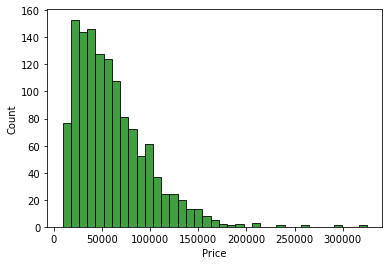

In [42]:
# Plotting a actual price distribution.
sn.histplot(data_df['Price'],color='green')

C:\Users\nitmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

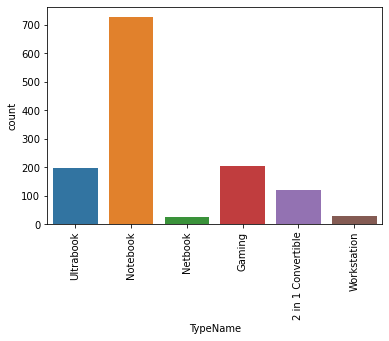

In [43]:
# Information related to various type of laptops.
sn.countplot(data_df['TypeName'])
plt.xticks(rotation = 'vertical')

C:\Users\nitmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


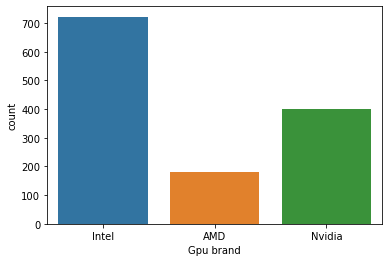

In [44]:
# Plotting GPU manufacture information.
sn.countplot(data_df['Gpu brand'])
plt.show()


In [45]:
# Extracting CPU manufacture details from the dataset.
cpu_manufacture = data_df['CPU_name'].str.split(' ',n = 1,expand=True)
cpu_manufacture.head()
data_df['CPU_manufacture'] = cpu_manufacture[0]

<AxesSubplot:ylabel='None'>

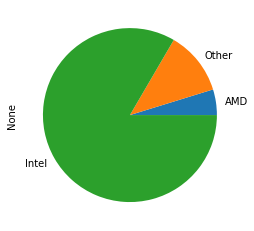

In [46]:
# Plotting the CPU manufacture details
cpu_value = data_df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

#### Data augmentation - Experiment

In [47]:
# Converting the label of notebook type into numeric identifier
notebook_type = data_df.value_counts("TypeName")
print(notebook_type)

# Method to create numeric values.
def type_convert_numeric(value):
    data_df['Type'] = np.select(
        condlist=[
            data_df['TypeName'] == "Notebook",
            data_df['TypeName'] == "Gaming",
            data_df['TypeName'] == "Ultrabook",
            data_df['TypeName'] == "2 in 1 Convertible",
            data_df['TypeName'] == "Workstation",
            data_df['TypeName'] == "Netbook",
        ],
        choicelist=[
            0,
            1,
            2,
            3,
            4,
            5
        ],
        default=0
    )

listTypes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible", "Workstation", "Netbook"]
for value in listTypes:
    type_convert_numeric(value)

data_df.head()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
dtype: int64


,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,2


In [48]:
# Drop columns in Dataframe.
data_df.drop(['Type'], axis=1)

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,33992.6400,Intel
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,79866.7200,Intel
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,12201.1200,Other
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,40705.9200,Intel


In [49]:
# Check for NULL values before partitioning.
data_df.isnull().sum()


Company            0
TypeName           0
Ram                0
OpSys              0
Weight             0
TouchScreen        0
IPS                0
PPI                0
CPU_name           0
HDD                0
SSD                0
Gpu brand          0
Price              0
CPU_manufacture    0
Type               0
dtype: int64

In [59]:
# Define X and Y values.
# x = data_df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1).values
# y = data_df['Price'].values

# Newer data splitting method.
train = data_df.drop(['Price'], axis=1)
# Only change here is usage of np.log().
testing = np.log(data_df['Price'])

In [60]:
# Validating the X dataset
train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU_manufacture,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel,3
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel,3
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other,0
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel,0


In [61]:
# Validating the Y dataset
testing

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [1]:
# Split data into train test validation.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, testing, test_size=0.15, random_state=6) # Change the values appropriately for the each model.

NameError: name 'train' is not defined

#### Prepare pipeline and mapper for the data.

In [90]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU_manufacture',
 13: 'Type'}

#### Define the machine learning model

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Select the number of columns.
selected_columns = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11,12])
],remainder='passthrough')

# Create the model as a another layer in the pipeline
linear_regression_model = LinearRegression() # Change the model here.

# Create the pipeline to connect the layers.
pipe = Pipeline([
    ('step1',selected_columns),
    ('step2',linear_regression_model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))

R2 score 0.8494505976307071


#### Get prediction and evaluate the accuracy

In [93]:
# Predict results with the trained model
y_pred = pipe.predict(x_test)

[11.1627264  10.90911007 11.48209572 11.19974232 10.55103207 11.21662426
 10.80430984 11.45734215 10.94224834 11.54307079 11.00412083 11.16644001
 10.757164   10.93481636 10.20401669 11.45589733 10.68044376 10.87709904
 11.16732121 10.82776451 11.82486248 11.70469856 10.72457981 11.32793427
 10.46448231 10.61266422 11.56487656 10.5252142  10.84860325 11.02127743
 11.55932045 10.9978838  10.62667847 11.70987797 11.69087029 11.72302532
 10.53640747 10.1899128  10.17692852  9.93738747  9.92727947  9.91831017
 11.68571663  9.75067711 10.50751019 11.07484245 10.50327778 10.4420166
 10.29776478 11.28264523 10.76562595 11.42431831 10.86132336 10.12391567
 10.8260107  10.28959846  9.93370152 10.68230438 10.66551304 11.15404606
 11.26119804 11.46743107  9.92727947 10.88084126  9.93082047 10.80724335
 10.98043156 10.94224834 11.69432354 11.11040974 10.69941425 10.67695332
 11.14627552 10.55986118 11.02539921  9.95980453  9.86440086 10.85993862
 10.60014153 11.68919468 11.03462505 11.8009882  11.

In [94]:
# Evaluate the accuracy of the model using r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8494505976307071

#### Final performance evaluation

In [95]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted value': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:20]

,Actual Price,Predicted value,Margin of error
724,11.182294,11.162726,0.019568
14,11.116331,10.909110,0.207221
165,11.470547,11.482096,-0.011548
823,11.064804,11.199742,-0.134938
459,10.436873,10.551032,-0.114159
1072,11.064804,11.216624,-0.151820
195,10.793392,10.804310,-0.010918
148,11.590859,11.457342,0.133517
1034,11.089509,10.942248,0.147261
179,11.288115,11.543071,-0.254956
